## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
df = pd.read_csv('data/poll.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
df.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [8]:
df.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [10]:
np.random.rand(5)

array([0.38465067, 0.87871092, 0.29352261, 0.33505829, 0.84512592])

In [11]:
np.random.rand(5) < .51

array([False, False,  True, False,  True])

In [13]:
np.where(np.random.rand(5) < .51, 'Brown', 'Green')

array(['Brown', 'Brown', 'Brown', 'Green', 'Green'], dtype='<U5')

In [14]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [15]:
s = sample(0.51,n=1000)

In [16]:
s.vote.value_counts(normalize=True)

Brown    0.508
Green    0.492
Name: vote, dtype: float64

In [17]:
dist = pd.DataFrame([sample(.51).vote.value_counts(normalize=True) for i in range(1000)])

In [18]:
dist.head()

,Brown,Green
vote,0.505,0.495
vote,0.522,0.478
vote,0.514,0.486
vote,0.502,0.498
vote,0.527,0.473


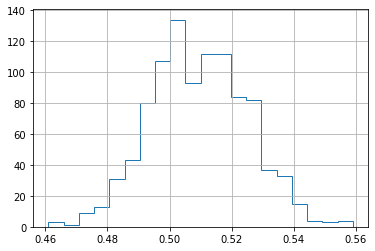

In [19]:
dist.Brown.hist(histtype='step',bins=20)

In [20]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [21]:
def quantiles(brown, n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [22]:
quantiles(.50)

(0.468975, 0.533)

In [23]:
quantiles(.48)

(0.448, 0.51)

In [24]:
quantiles(.54)

(0.508, 0.569)

In [25]:
dist = samplingdist(.50,10000)

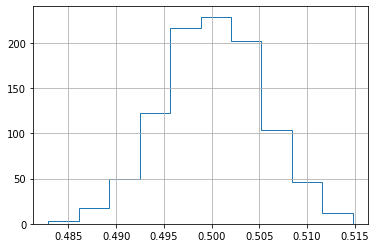

In [26]:
dist.Brown.hist(histtype='step')

In [30]:
largepoll = pd.read_csv('data/poll-larger.csv')

In [31]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64